## Analyze missing values
In `train.csv`, There is many missing values.  
Speically, All missing values be into a column of `Promotion 1`, ... , `Promotion 5`.

I want to find **features and hided relations** in missing values to make our data modeling more clear.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6255 non-null   int64  
 1   Date          6255 non-null   object 
 2   Temperature   6255 non-null   float64
 3   Fuel_Price    6255 non-null   float64
 4   Promotion1    2102 non-null   float64
 5   Promotion2    1592 non-null   float64
 6   Promotion3    1885 non-null   float64
 7   Promotion4    1819 non-null   float64
 8   Promotion5    2115 non-null   float64
 9   Unemployment  6255 non-null   float64
 10  IsHoliday     6255 non-null   bool   
 11  Weekly_Sales  6255 non-null   float64
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 543.8+ KB


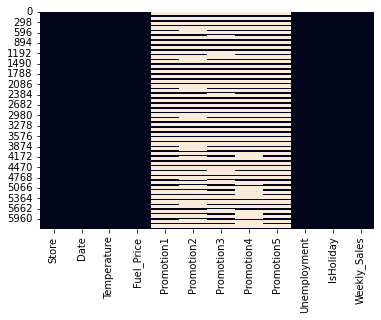

Store      Date  Temperature  Fuel_Price  Promotion1  Promotion2  \
0         1  20100205        42.31       2.572         NaN         NaN   
5421     40  20100205        14.48       2.788         NaN         NaN   
1529     12  20100205        49.47       2.962         NaN         NaN   
4726     35  20100205        27.19       2.784         NaN         NaN   
2224     17  20100205        23.11       2.666         NaN         NaN   
...     ...       ...          ...         ...         ...         ...   
6115     44  20120928        64.80       3.821      380.96         NaN   
972       7  20120928        50.64       3.789     3735.20        6.91   
5281     38  20120928        81.22       3.966      201.62         NaN   
1667     12  20120928        81.22       3.966     3068.35       27.82   
6254     45  20120928        64.88       3.997     4556.61       20.64   

      Promotion3  Promotion4  Promotion5  Unemployment  IsHoliday  \
0            NaN         NaN         NaN         8.106      False   
5421         NaN         NaN         NaN         5.892      False   
1529         NaN         NaN         NaN        13.975      False   
4726         NaN         NaN         NaN         9.262      False   
2224         NaN         NaN         NaN         6.548      False   
...          ...         ...         ...           ...        ...   
6115         NaN         NaN     2022.03         5.407      False   
972         4.50      917.20     1793.35         7.872      False   
5281         NaN       29.21      802.50        10.926      False   
1667        0.22     1307.43     3605.14        10.926      False   
6254        1.50     1601.01     3288.25         8.684      False   

      Weekly_Sales  
0       1643690.90  
5421    1001943.80  
1529    1100046.37  
4726    1230613.50  
2224     789036.02  
...            ...  
6115     355307.94  
972      525545.76  
5281     398468.08  
1667     880415.67  
6254     713173.95  

[6255 rows x 12 columns]

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


train = pd.read_csv("/dataset/train.csv").drop(columns=["id"])
train.info()
sns.heatmap(train.isnull(), cbar=False)
plt.show()


def preprocess_date(date):
    day = date[:2]
    month = date[3:5]
    year = date[6:]
    return year + month + day

train["Date"] = train["Date"].apply(preprocess_date)
train.sort_values(by="Date")

In [5]:
######## Handling of Missing Values ########

def find_notnull(df, col):
    return df[df[col].notnull()]
    

promo1 = train[["Date", "Promotion1"]]
promo2 = train[["Date", "Promotion2"]]
promo3 = train[["Date", "Promotion3"]]
promo4 = train[["Date", "Promotion4"]]
promo5 = train[["Date", "Promotion5"]]

promo1 = find_notnull(promo1, "Promotion1")
promo2 = find_notnull(promo2, "Promotion2")
promo3 = find_notnull(promo3, "Promotion3")
promo4 = find_notnull(promo4, "Promotion4")
promo5 = find_notnull(promo5, "Promotion5")

promo1.to_csv("promo1.csv")
promo2.to_csv("promo2.csv")
promo3.to_csv("promo3.csv")
promo4.to_csv("promo4.csv")
promo5.to_csv("promo5.csv")

print(promo1, end='\n\n\n\n')
print(promo2, end='\n\n\n\n')
print(promo3, end='\n\n\n\n')
print(promo4, end='\n\n\n\n')
print(promo5)

          Date  Promotion1
92    20111111    10382.90
93    20111118     6074.12
94    20111125      410.31
95    20111202     5629.51
96    20111209     4640.65
...        ...         ...
6250  20120831    23641.30
6251  20120907    11024.45
6252  20120914    11407.95
6253  20120921     8452.20
6254  20120928     4556.61

[2102 rows x 2 columns]



          Date  Promotion2
92    20111111     6115.67
93    20111118      254.39
94    20111125       98.00
95    20111202       68.00
96    20111209       19.00
...        ...         ...
6249  20120824       58.38
6250  20120831        6.00
6251  20120907       12.80
6253  20120921       92.28
6254  20120928       20.64

[1592 rows x 2 columns]



          Date  Promotion3
92    20111111      215.07
93    20111118       51.98
94    20111125    55805.51
95    20111202     1398.11
96    20111209      105.02
...        ...         ...
6250  20120831       92.93
6251  20120907       52.63
6252  20120914        4.30
6253  20120921       63.24

### Result
Note that every promotion values are `NaN` before **2011/11/11**.
So, I'm going to use data after **2011/11/10**.

My approach to the missing data is **to simply omit** those cases with the missing data and analyze the remaining data.